## $\color{red}{\text{Data source}}$


Climate Change: Earth Surface Temperature Data

(https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)


## $\color{red}{\text{Import required libraries}}$




In [1]:
## Data reading
from zipfile import ZipFile
import os,shutil, glob
import re

## Data analysis
import numpy as np
import pandas as pd
import pandas_profiling
import missingno as msno

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly  as py



 ## $\color{red}{\text{Reading data from zip files}}$


In [2]:
directory="myfolder"

try:
  os.system("rm -rf %s " %directory)
except:
  pass
os.mkdir(directory)


## moving  data into myfolder 
for x in os.listdir('.'):
  if re.match('.*\.zip', x):
    with ZipFile(x, 'r') as zip:
      zip.extractall()
      y=x.split('.')[0]+'.csv'   
      shutil.copy(y, '/content/myfolder')
  elif re.match('.*\.csv', x):
    shutil.copy(x, '/content/myfolder') 
  

In [3]:
os.chdir('/content/myfolder')
df_Country= pd.read_csv("GlobalLandTemperaturesByCountry.csv",parse_dates=['dt'])
    

 ## $\color{red}{\text{Data profiling}}$


In [4]:
pandas_profiling.ProfileReport(df_Country)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Quick conclusions from data profiling

*   No duplicate entries
*   There are large number of missing values


 ##  $\color{red}{\text{A closer look at the missing values }}$




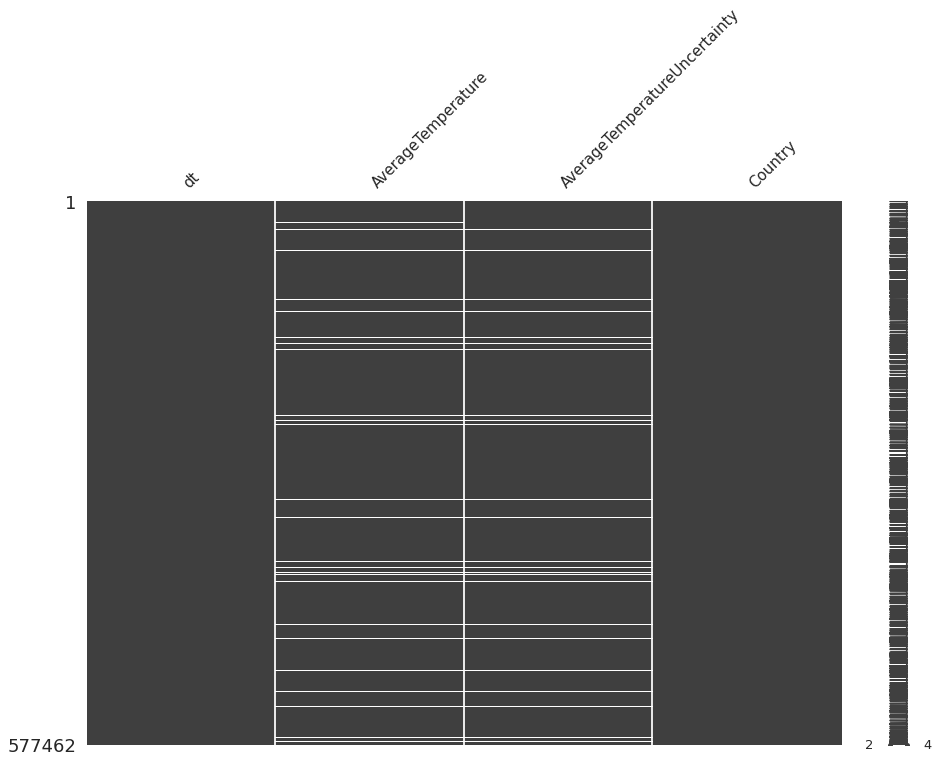

In [ ]:
msno.matrix(df_Country, figsize=(15,10), fontsize=15, sparkline=True)

In [5]:
df_Country.dropna(inplace=True)

In [6]:
df_Country.reset_index(drop=True)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland
3,1744-06-01,11.609,1.577,Åland
4,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
544806,2013-04-01,21.142,0.495,Zimbabwe
544807,2013-05-01,19.059,1.022,Zimbabwe
544808,2013-06-01,17.613,0.473,Zimbabwe
544809,2013-07-01,17.000,0.453,Zimbabwe


In [7]:
country_code=pd.read_csv("/content/countrycode.csv")

In [8]:
country_code

,Country,AverageTemperature,Codes
0,Afghanistan,14.045007,AFG
1,Africa,24.074203,NaN
2,Albania,12.610646,ALB
3,Algeria,22.985112,DZA
4,American Samoa,26.611965,ASM
...,...,...,...
238,Western Sahara,22.319818,ESH
239,Yemen,26.253597,YEM
240,Zambia,21.282956,ZMB
241,Zimbabwe,21.117547,ZWE


In [9]:
code2=country_code['Codes'].values.tolist()
list1=df_Country['Country'].values.tolist()
list2=country_code['Country'].values.tolist()
code1=[]
for item in list1:
    if item in list2:
      code1.append(code2[list2.index(item)])
    else:
       code1.append('NA')

In [10]:
df_Country['Codes']=code1

In [11]:
df_Country['Year']=pd.DatetimeIndex(df_Country['dt']).year

In [12]:
df_Country.to_csv("df_country.csv",index=None)

In [13]:
df_Country1=df_Country.groupby(['Year','Country', 'Codes'],  as_index=False)["AverageTemperature"].mean()

In [ ]:
df_Country1

,Year,Country,Codes,AverageTemperature
0,1743,Albania,ALB,8.62000
1,1743,Andorra,AND,7.55600
2,1743,Austria,AUT,2.48200
3,1743,Belarus,BLR,0.76700
4,1743,Belgium,BEL,7.10600
...,...,...,...,...
43791,2013,Western Sahara,ESH,23.74425
43792,2013,Yemen,YEM,28.12975
43793,2013,Zambia,ZMB,21.19600
43794,2013,Zimbabwe,ZWE,20.71075


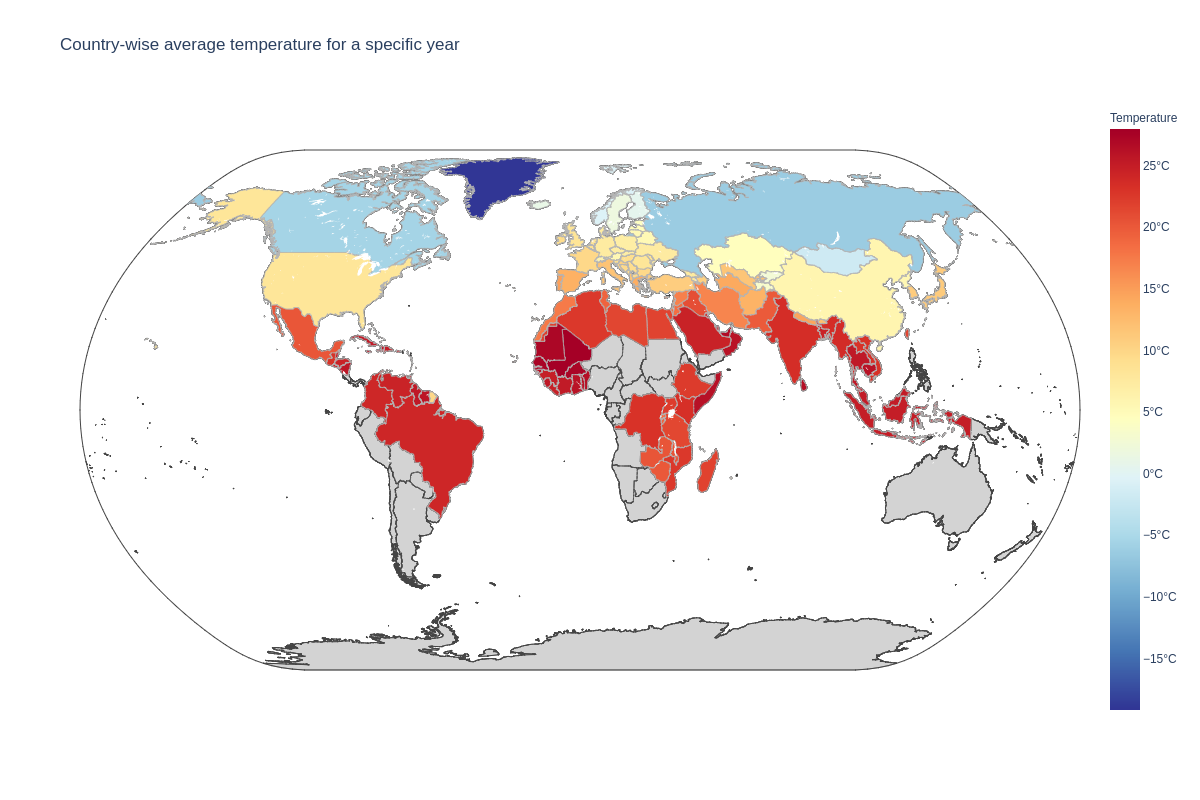

In [17]:
year=1850

data = [ dict(
        type = 'choropleth',
        locations =df_Country1[df_Country1['Year']==year].Codes.values,
        z = df_Country1[df_Country1['Year']==year].AverageTemperature.values,
        text = df_Country1[df_Country1['Year']==year].Country.values,
        colorscale = 'rdylbu',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            ticksuffix= '\N{DEGREE SIGN}C',
            title = 'Temperature ',
            ),
      ) ]

layout = dict(
    geo = dict(
        landcolor = 'lightgray',
        showland = True,
        showcountries = True,
        countrycolor = '#444444',
        countrywidth = 0.5,
        resolution= 50,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = go.FigureWidget( data=data, layout=layout )
fig.layout.title = 'Country-wise average temperature for a specific year'
fig.show("png",width=1200, height=800)

In [18]:
options =["Africa", "Europe", "South America", "North America", "Oceania", "Asia"]

df_Country2 =df_Country.loc[df_Country['Country'].isin(options)]

In [19]:
df_Country2.drop("Codes",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
df_Country2['Country'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [21]:
df_Country2['Year']=pd.DatetimeIndex(df_Country2['dt']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df_Country2.isnull().values.any()

False

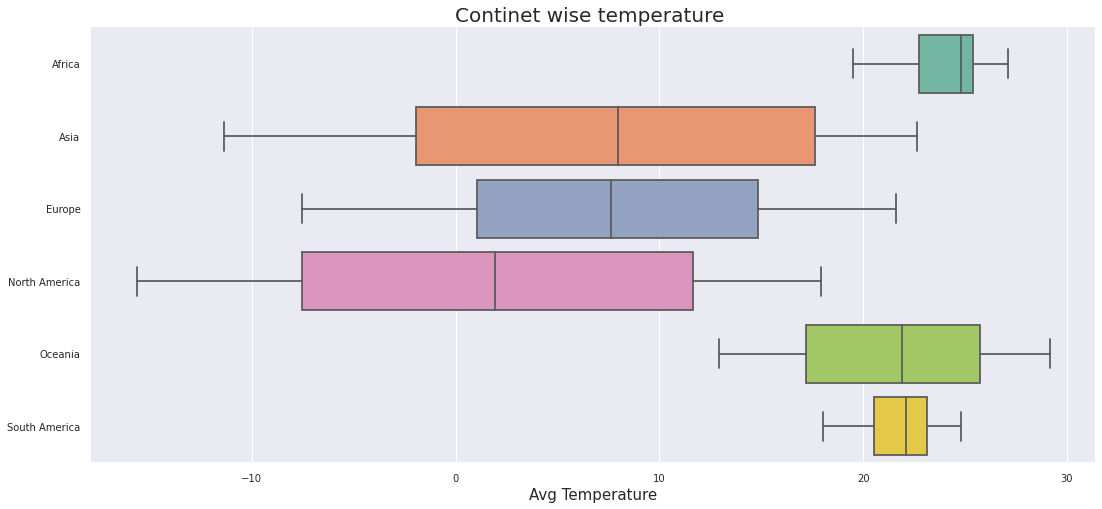

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,8))
sns.boxplot(
            y="Country",
            x="AverageTemperature" ,
            data=df_Country2,
            palette="Set2")
plt.xlabel(None, size=20)
plt.xlabel("Avg Temperature", size=15)
plt.title("Continet wise temperature ",size=20)
plt.ylabel(None)
plt.show()

In [24]:
df_Country2=df_Country2.groupby(['Year','Country'],as_index=False)['AverageTemperature','AverageTemperatureUncertainty'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



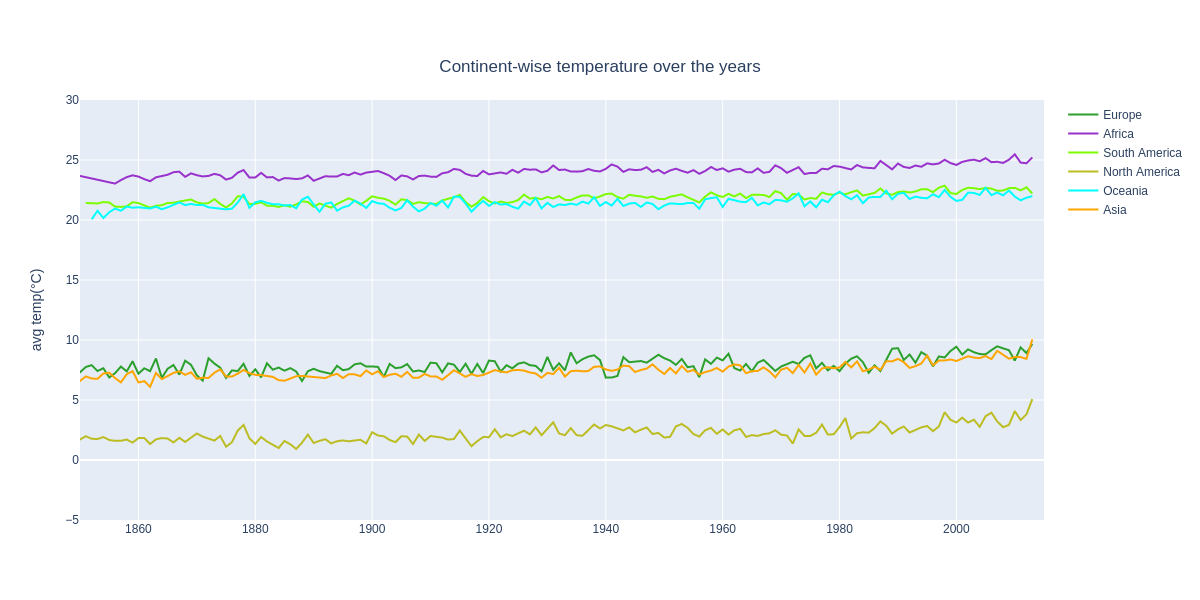

In [26]:
fig = go.Figure([
    go.Scatter(
        name='Europe',
       x=df_Country2[df_Country2['Country']=='Europe'].Year.values,
        y=df_Country2[df_Country2['Country']=='Europe'].AverageTemperature.values,
        mode='lines',
        line=dict(color='rgb(44, 160, 44)'),
    ),
    go.Scatter(
        name='Africa',
        x=df_Country2[df_Country2['Country']=='Africa'].Year.values,
        y=df_Country2[df_Country2['Country']=='Africa'].AverageTemperature.values,
        mode='lines',
        line=dict(color='darkorchid',width=2),
    ), 

    go.Scatter(
        name='South America',
        x=df_Country2[df_Country2['Country']=='South America'].Year.values,
        y=df_Country2[df_Country2['Country']=='South America'].AverageTemperature.values,
        mode='lines',
        line=dict(color='lawngreen'),
    ), 

    go.Scatter(
        name='North America',
        x=df_Country2[df_Country2['Country']=='North America'].Year.values,
        y=df_Country2[df_Country2['Country']=='North America'].AverageTemperature.values,
        mode='lines',
        line=dict(color='rgb(188, 189, 34)'),
    ),
    go.Scatter(
        name='Oceania',
        x=df_Country2[df_Country2['Country']=='Oceania'].Year.values,
        y=df_Country2[df_Country2['Country']=='Oceania'].AverageTemperature.values,
        mode='lines',
        line=dict(color='aqua', width=2),
    ),
    go.Scatter(
        name='Asia',
        x=df_Country2[df_Country2['Country']=='Asia'].Year.values,
        y=df_Country2[df_Country2['Country']=='Asia'].AverageTemperature.values,
        mode='lines',
        line=dict(color='orange',width=2),
    ),
])
fig.update_layout(
    yaxis_title='avg temp(\N{DEGREE SIGN}C)',
    title={
        'text': "Continent-wise temperature over the years",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   hovermode="x"
)
fig.update_layout(xaxis_range=[1850,2015])
fig.update_layout(yaxis_range=[-5,30])
fig.show("png",width=1200, height=600)

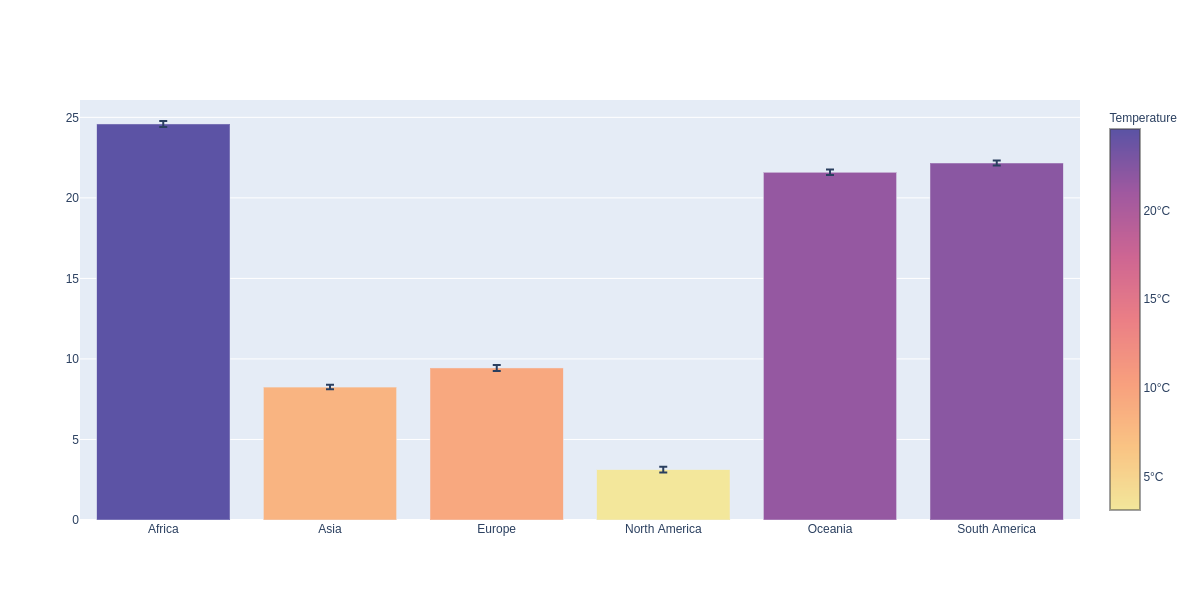

In [30]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()



list=[2000]#df_Country2["Year"].unique()
for year in list:

    list1=sorted(df_Country2["Country"].unique())
    list2= df_Country2[df_Country2["Year"]==year].AverageTemperature.values
    list3= df_Country2[df_Country2["Year"]==year].AverageTemperatureUncertainty.values
    fig.add_trace(
       go.Bar(visible=False,x=list1, y=list2, error_y_array=list3,marker=dict(color = list2,colorbar = dict(
            ticksuffix= '\N{DEGREE SIGN}C',
            title = 'Temperature ',
            ),
                     colorscale='sunset')))

fig.data[0].visible = True

# Create and add slider
steps = []

for i in range(len(fig.data)):
    YEAR=list[i]
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Slider switched to step:{YEAR}" }],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show("png",width=1200, height=600)#
